In [ ]:
import pandas as pd #Data processing 
import numpy as np #Linear Algebra  
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
import time #For managing time
import io


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv'])) # Dataset is now stored in a Pandas Dataframe
df.head() #The head() function is used to get the first n rows.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


DROPPING UNWANTED COLUMNS FROM DATAFRAME

In [ ]:
#ID, DIAGNOSIS & UNNAMED 32 ARE REDUNDANT COLUMNS

df1 = df.drop(['Unnamed: 32','id','diagnosis'],axis=1) #To specify we want to drop column, we need to provide axis=1

df1.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Counting Number of "M" Tumors and "B" Tumors. Representing them in Box plot

Number of Benign Tumor: 357
Number of Malignant Tumor: 212


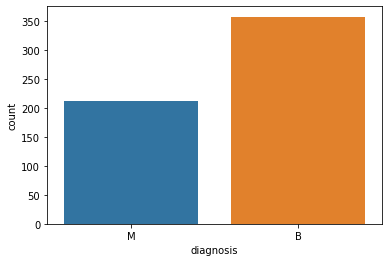

In [ ]:
B, M = df['diagnosis'].value_counts() #Pandas method to count 
print("Number of Benign Tumor:",B)
print("Number of Malignant Tumor:",M)

sns.countplot(df['diagnosis'],label="Count")

Now lets get features from our non redundant data


In [ ]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# ***VIOLIN*** ***PLOTS***

**Violin** **plots** are similar to box plots, except that they also show the probability density of the data at different values

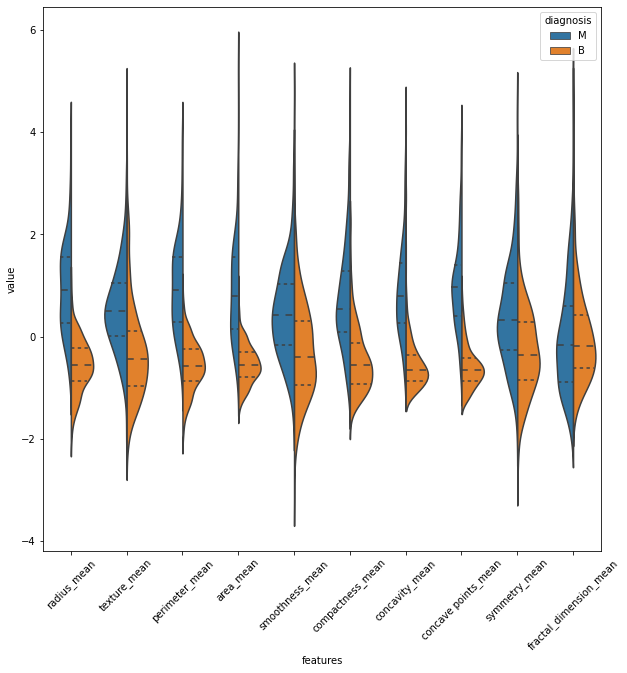

In [ ]:
data =df1 #Subsetted data in df1 
#Standardise data in order to prevent larger range
std_data = (data - data.mean()) / (data.std()) #formula for standardization
y=df.diagnosis #Traget vector, Malignant and Benign tumors data

#Concatenating the target vector and subsetted data
#Selecting all rows and 1st ten columns. To make sure we are selecting columns set axis= 1
data = pd.concat([y,std_data.iloc[:,0:10]],axis=1) # We will get error after this step
 
# Melt: It's used to create a specific format of the DataFrame object where one or more columns work as identifiers.
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

#Resize the shape
plt.figure(figsize=(10,10))

#hue takes the color of the specified variable
#Malignant tumor will take one color Bening will take another
#Quartiles will also be displayed
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")

plt.xticks(rotation=45); #Incline the x axis names to certain degree


Second feature we see that both tumors have significantly different mean
While last feature has mean almost same for both the features
The second feature can be useful in classification while last one won't be that helpful

FEATURES 10-19

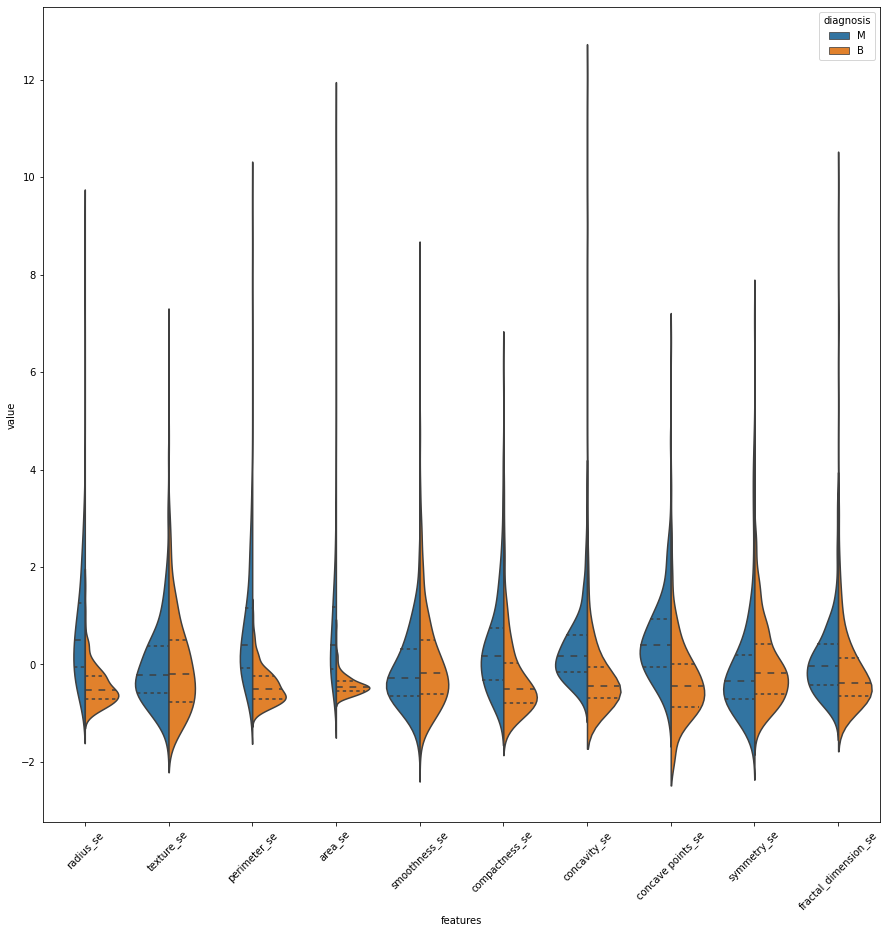

In [ ]:
data = pd.concat([y,std_data.iloc[:,10:20]],axis=1) # We will get error after this step
 
# Melt: It's used to create a specific format of the DataFrame object where one or more columns work as identifiers.
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

#Resize the shape
plt.figure(figsize=(15,15))

#hue takes the color of the specified variable
#Malignant tumor will take one color Bening will take another
#Quartiles will also be displayed
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")

plt.xticks(rotation=45); #Incline the x axis names to certain degree


FEATURE 20 to 30

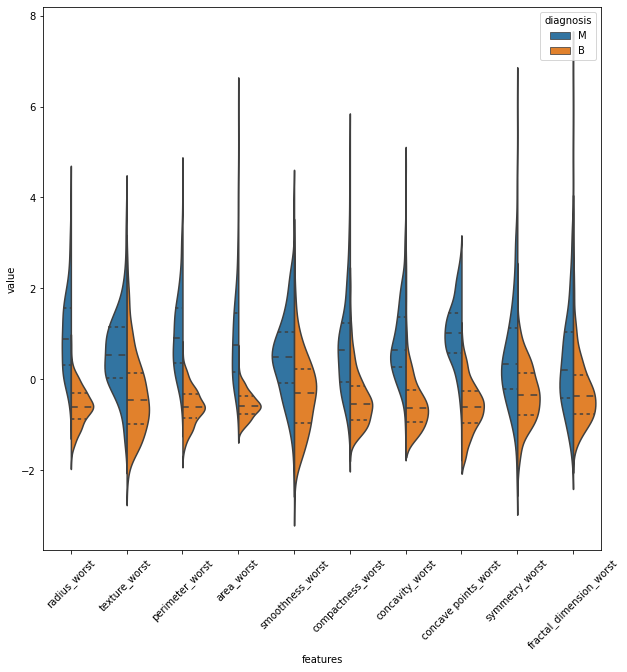

In [ ]:
data = pd.concat([y,std_data.iloc[:,20:31]],axis=1) # We will get error after this step
 
# Melt: It's used to create a specific format of the DataFrame object where one or more columns work as identifiers.
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

#Resize the shape
plt.figure(figsize=(10,10))

#hue takes the color of the specified variable
#Malignant tumor will take one color Bening will take another
#Quartiles will also be displayed
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")

plt.xticks(rotation=45); #Incline the x axis names to certain degree


Feature concavity_worst and concave points_worst have similar structure, so they are correlated to each other in future we can drop one of them to reduce redundancy

## ***BOX*** ***PLOT***

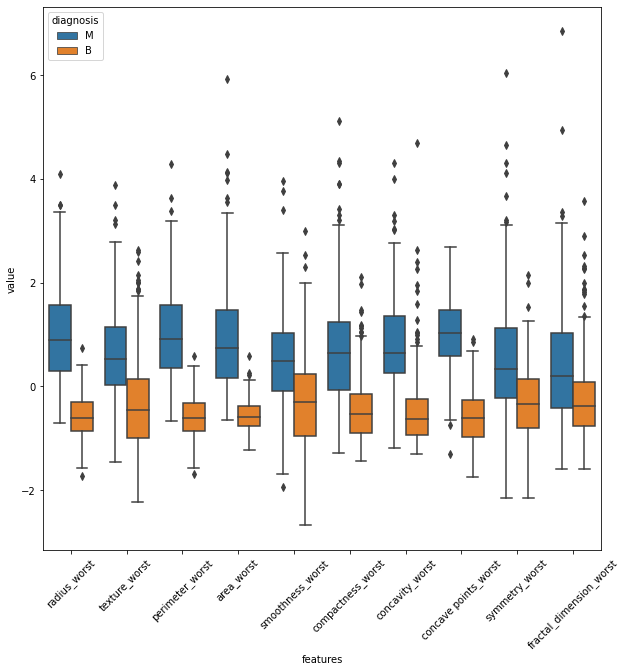

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

Join plot determines whether 2 features fall on straight line

## ***JOIN PLOT***

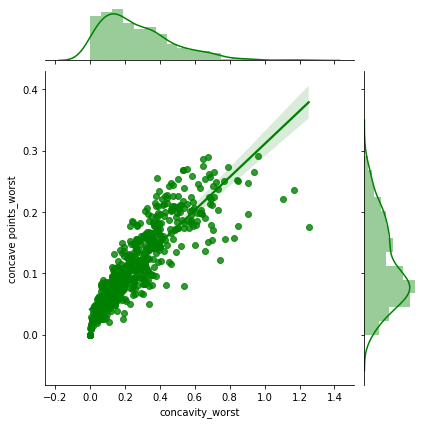

In [ ]:
sns.jointplot("concavity_worst",
              "concave points_worst",
              df1,
              kind="regg",
              color="g");

# ***SWARM PLOT***

Swarm plots plot all data points

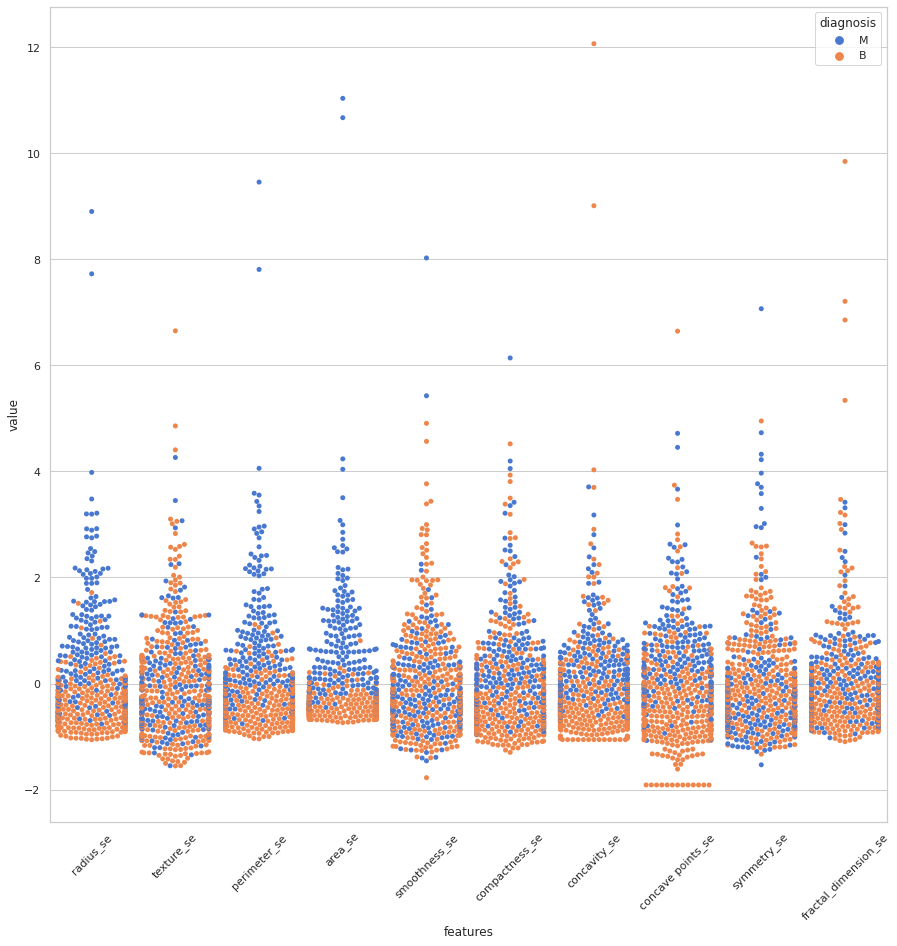

In [ ]:
#sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,std_data.iloc[:,10:20]],axis=1) # We will get error after this step
 
# Melt: It's used to create a specific format of the DataFrame object where one or more columns work as identifiers.
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

#Resize the shape
plt.figure(figsize=(15,15))

#hue takes the color of the specified variable
#Malignant tumor will take one color Bening will take another
#Quartiles will also be displayed
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=45); #Incline the x axis names to certain degree


Feature smoothness_se is not appropriate for prediction as the Malignant and Beging tumar data is mixed up.

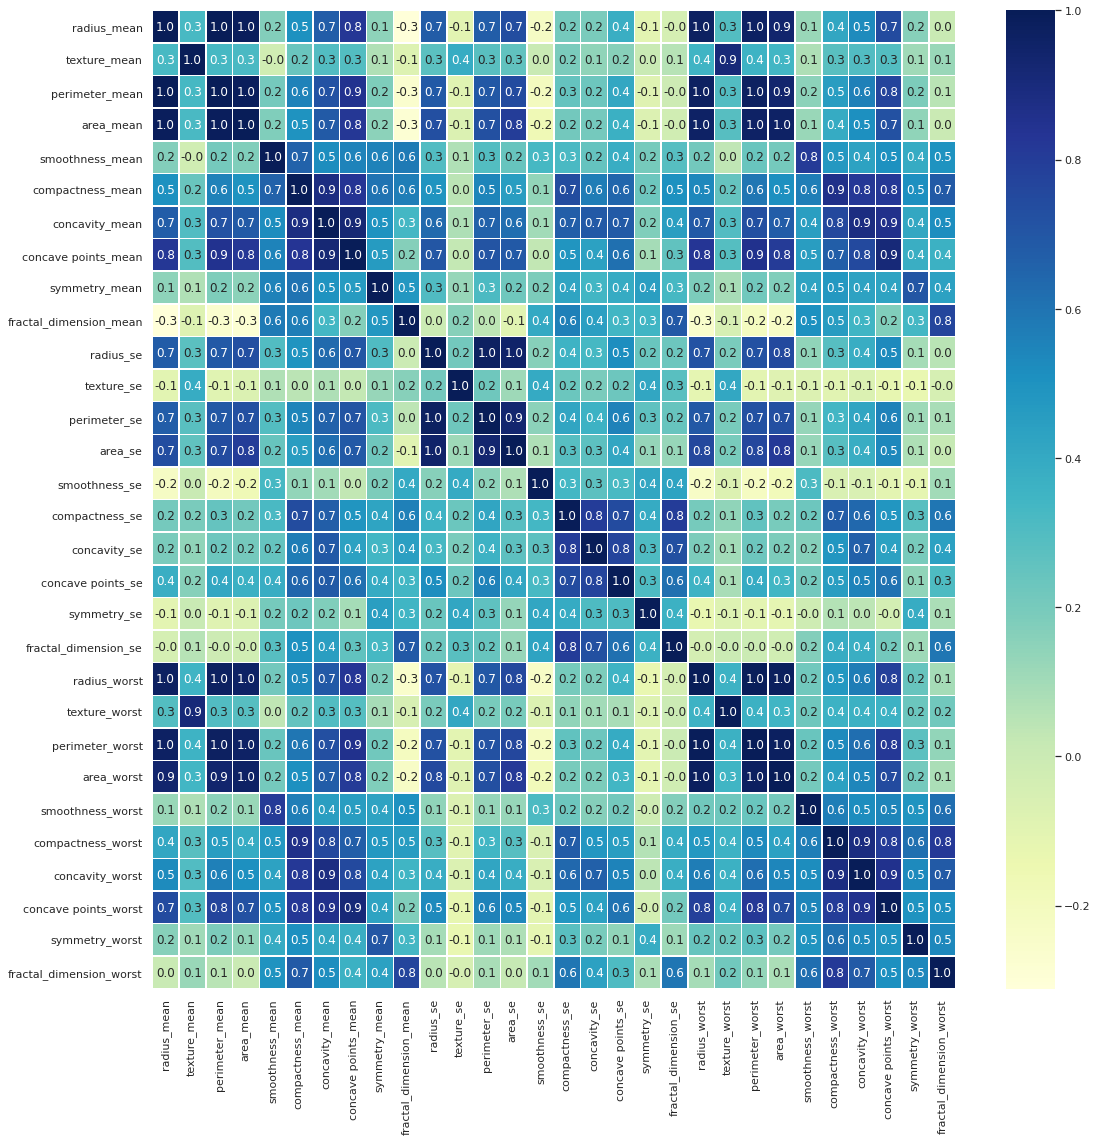

In [ ]:
#correlation map
plt.subplots(figsize=(18, 18))
#Annotate each cell with the numeric value using integer formatting
#fmt : String formatting code to use when adding annotations, decides number of decimal places 
#cmap : Colormap
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="YlGnBu"); 